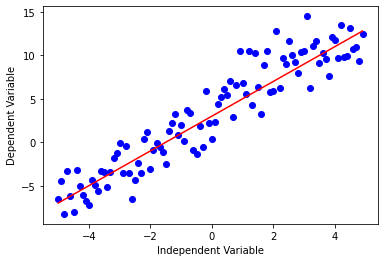

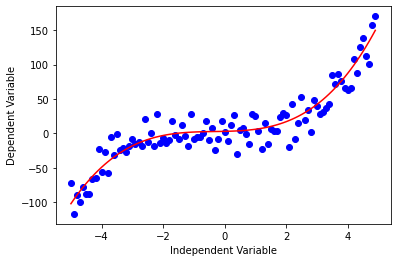

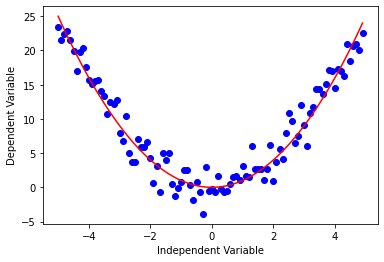

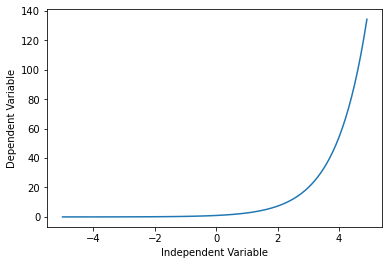

<ipython-input-34-62784a1cd5b2>:59: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


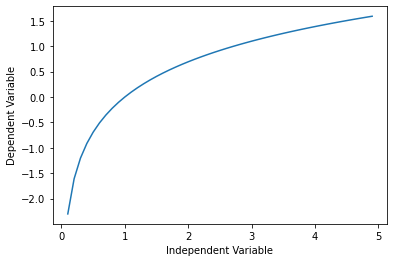

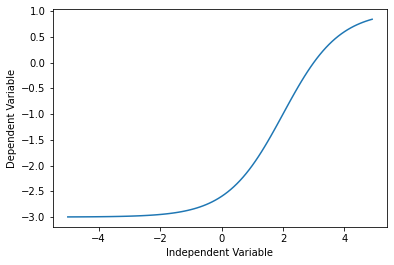

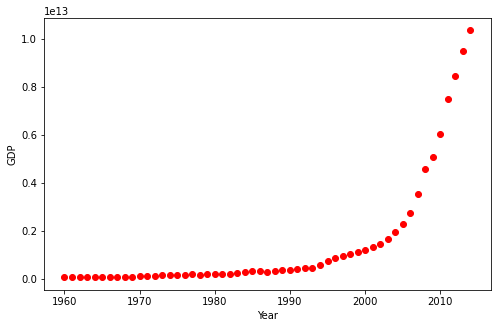

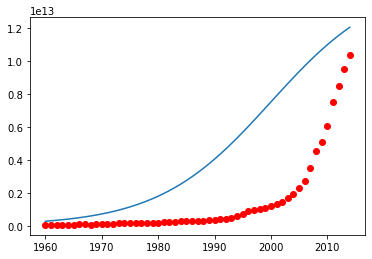

 beta_1 = 690.451712, beta_2 = 0.997207


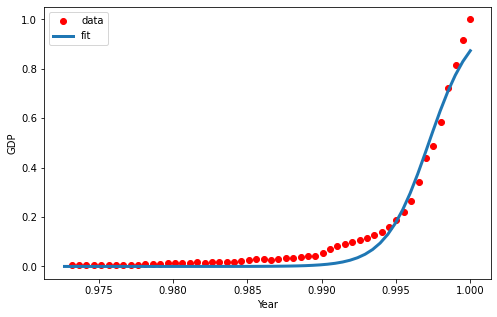

In [34]:
#WEEK 2
#SLR MLR AND PLR ARE SAME AS DA COURSE.

#Non Linear Regression Analysis:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()



#For an example, we're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014.
#We download a dataset with two columns, the first, a year between 1960 and 2014,
#the second, China's corresponding annual gross domestic income in US dollars for that year.

import numpy as np
import pandas as pd

#downloading dataset
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
df = pd.read_csv(url)
df.head(10)

plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

#yhat or any function y(here it is log function)
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2))) #𝛽_1 : Controls the curve's steepness,𝛽_2 : Slides the curve on the x-axis.
     return y

beta_1 = 0.1  #change values to see its effect
beta_2 = 2000

#logistic function
Y_hat = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, y_data, 'ro')  
plt.plot(x_data, Y_hat*15000000000000.)
plt.show()

# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#How we find the best parameters for our fit line? 
  #we can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.
  #popt are our optimized parameters.
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

#Now we plot our resulting regression model.
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
yhat = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  
Train set: (800, 11) (800,)
Test set: (200, 11) (200,)
KNeighborsClassifier(n_neighbors=4)
Train set Accuracy:  0.5475
Test set Accuracy:  0.32
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F    

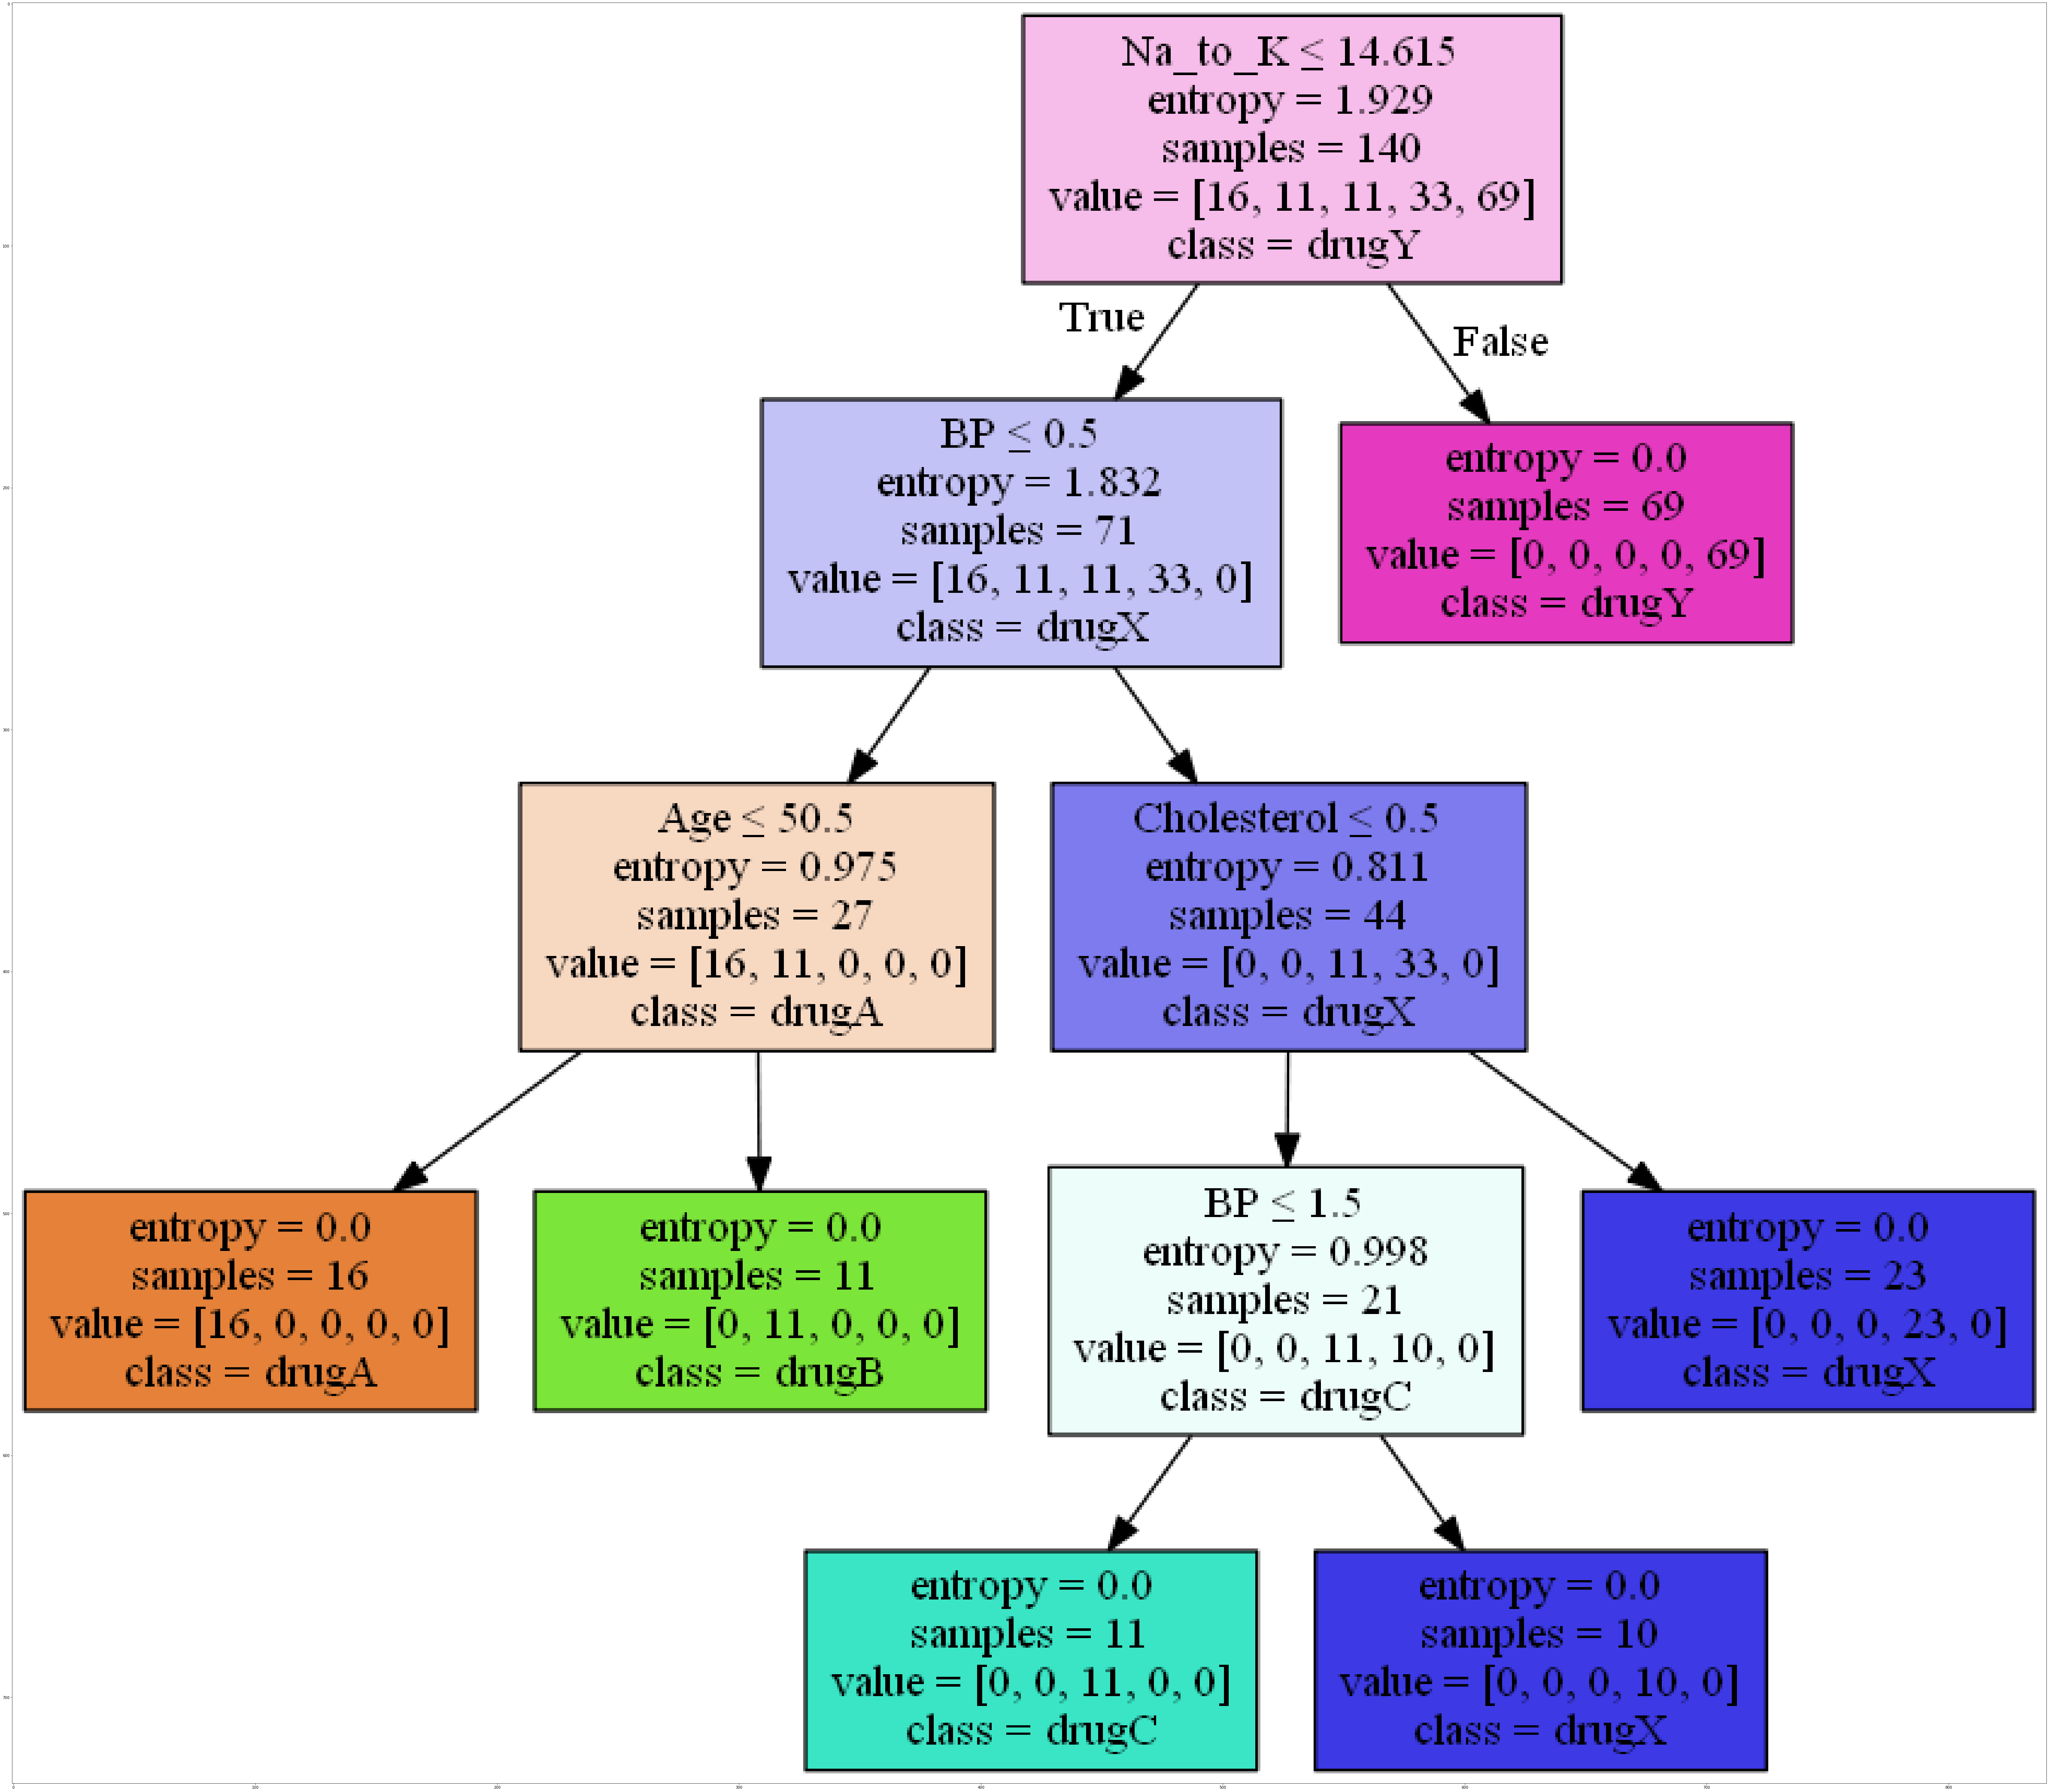

In [1]:
#WEEK 3
#CLASSIFICATION
#KNN #DECISION TREE 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"
df = pd.read_csv(url)
print(df.head())
df['custcat'].value_counts()

#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
X[0:5]
y = df['custcat'].values
y[0:5]

#normalize data-Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#test_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)





#KNN

from sklearn.neighbors import KNeighborsClassifier
k = 4

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(neigh)
yhat = neigh.predict(X_test)

#Accuracy evaluation :In multilabel classification, accuracy classification score is a function that computes subset accuracy.
#This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


#We can calculate the accuracy of KNN for different values of k.
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc




#Decision Tree
from sklearn.tree import DecisionTreeClassifier

url2="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
my_data = pd.read_csv(url2, delimiter=",")
print(my_data[0:5])

X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]
y = my_data["Drug"]
#preprocessing: changing categorical age,sex,bp to numerical using labelEncoder :some features in this dataset are categorical, such as Sex or BP. Unfortunately, Sklearn Decision Trees does not handle categorical variables.
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


#test_train #object #fit #predict
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3) #split
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4) #object #criterion="entropy" so we can see the information gain of each node.
drugTree.fit(X_train,y_train) #fit
yhat = drugTree.predict(X_test) #predict #yhat
print (yhat [0:5])
print (y_test [0:5])

#checking accuracy of model
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

#Vizualisation

#!conda install -c conda-forge pydotplus -y # !pip install pydotplus
#!conda install -c conda-forge python-graphviz -y # !pip install graphviz

import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"


from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')











In [6]:
#WEEK 3 continue (log reg,svm),predict_prob,Jaccard index,log loss
 
#Logistc regression    
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)

churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')

X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(churn_df['churn'])

#normalisation/standardisation
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

#Train/Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#https://medium.com/@aditya97p/l1-and-l2-regularization-237438a9caa6
#difference l1 and l2:https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
#The regression model which uses L1 regularization is called Lasso Regression and model which uses L2 is known as Ridge Regression.
#Regularization is a technique used to solve the overfitting problem of machine learning models.
#C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization.
#solver:Algorithm to use in the optimization problem.For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
#For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.‘liblinear’ and ‘saga’ also handle L1 penalty


LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train) #object and fit

#predict  
yhat = LR.predict(X_test) 

#predict_proba returns estimates for all classes, ordered by the label of classes.
#the first column is the probability of class 0, P(Y=0|X),second column is probability of class 1, P(Y=1|X):
yhat_prob = LR.predict_proba(X_test)
yhat_prob

#Evaluation
#https://www.youtube.com/watch?v=Js3GLb1xPhc&ab_channel=KrishNaik
#Jaccard index
from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, yhat,pos_label=0))
#log loss
from sklearn.metrics import log_loss
print(log_loss(y_test, yhat_prob))

0.7058823529411765
0.6017092478101187


In [12]:
#WEEK 3 continue (svm),f1-score,Jaccard index
    


### SVM
#https://www.youtube.com/watch?v=Js3GLb1xPhc&ab_channel=KrishNaik
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv"
cell_df = pd.read_csv(url)
cell_df.head()
cell_df.dtypes

#df['BareNuc'] is dtype object and has null values
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])

#train,test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


#modelling #fit
from sklearn import svm
clf = svm.SVC(kernel="rbf")#check for kernal="linear"(no change in accuracy) #The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:1.Linear2.Polynomial3.Radial basis function (RBF)4.SigmoidLet's just use the default, RBF (Radial Basis Function) for this lab.
clf.fit(X_train, y_train)

#predict
yhat = clf.predict(X_test)

#evaluation
from sklearn.metrics import f1_score
print("f1 score is=",f1_score(y_test, yhat, average='weighted'))

from sklearn.metrics import jaccard_score
print("jaccard score is",jaccard_score(y_test, yhat,pos_label=2))


Train set: (546, 9) (546,)
Test set: (137, 9) (137,)
f1 score is= 0.9639038982104676
jaccard score is 0.9444444444444444


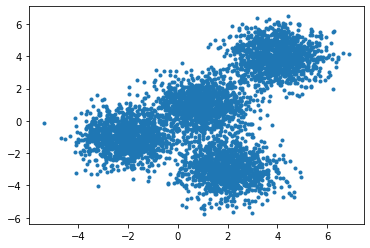

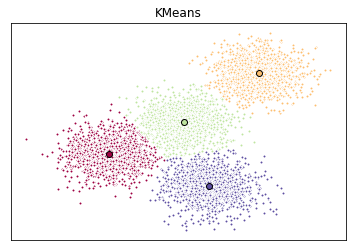

In [7]:
#WEEK4 CLUSTERING

#k means 1: practice
import random 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import make_blobs 

#Let's create our own dataset for this lab!
np.random.seed(0) #SEED IS SET TO 0

#Next we will be making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but we will be using these specific ones.

#Input

#n_samples: The total number of points equally divided among clusters.
#Value will be: 5000
#centers: The number of centers to generate, or the fixed center locations.
#Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
#cluster_std: The standard deviation of the clusters.how away the points are from the centroids. choose between 0.5-1.5
#Value will be: 0.9

#output in x,y
#X: Array of shape [n_samples, n_features]. (Feature Matrix)
#The generated samples.
#y: Array of shape [n_samples]. (Response Vector)
#The integer labels for cluster membership of each sample.
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

plt.scatter(X[:, 0], X[:, 1], marker='.')


#working on k means

from sklearn.cluster import KMeans 
#The KMeans class has many parameters that can be used, but we will be using these three:

#init: Initialization method of the centroids.
  #Value will be: "k-means++"
  #k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
#n_clusters: The number of clusters to form as well as the number of centroids to generate.
  #Value will be: 4 (since we have 4 centers)
#n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
  #Value will be: 12
    
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12) #model object
k_means.fit(X) #fit

k_means_labels = k_means.labels_ #The output is a one dimensional array of n elements corresponding to the clusters(here 4) assigned to our 10 data points.
k_means_labels[:200]

k_means_cluster_centers = k_means.cluster_centers_ #We will also get the coordinates of the cluster centers using KMeans' .cluster_centers_ and save it as k_means_cluster_centers 
k_means_cluster_centers



#plot

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  Clus_km  
0        0.0              6.3        0  
1        0.0             12.8        2  
2        1.0             20.9        0  
3        0.0              6.3        0  
4        0.0              7.2        1  
[41. 47. 33. 29. 47. 40. 38. 42. 26. 47. 44. 34. 24. 46. 28. 24. 29. 43.
 44. 36. 29. 36. 28. 45. 37. 43. 24. 37. 38. 34. 40. 42. 23. 40. 28. 33.
 35. 37. 22. 39. 20. 48. 28. 37. 48. 45. 22. 30. 28. 29. 47. 36. 24. 56.
 29. 34. 32. 27. 40. 50. 39. 34. 36. 44. 24. 31. 34. 26. 38. 24. 30. 40.
 30. 25. 29

<ipython-input-12-6a77cdbbc899>:48: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 3],s=area,c=labels.astype(np.float), alpha=0.5) #s=marker size,c=color of sequence of colors for markers.


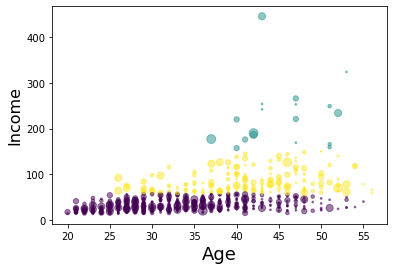

<ipython-input-12-6a77cdbbc899>:67: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


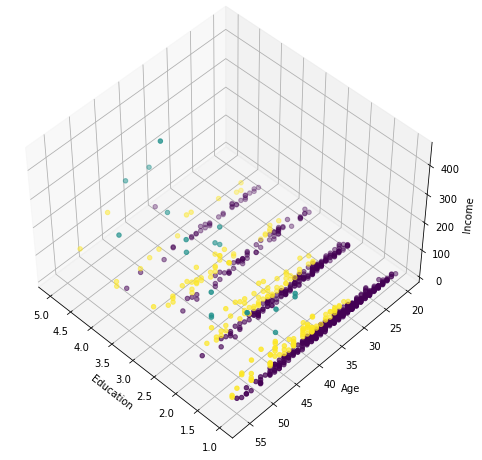

In [12]:
#WEEK4 CLUSTERING: K means 2

# Customer Segmentation with K-Means
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
import pandas as pd
import numpy as np
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv"
cust_df = pd.read_csv(url)
cust_df.head()




#Pre-processing
#. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance
   #function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.
df = cust_df.drop('Address', axis=1)
df.head()



#Normalizing over the standard deviation
#Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different
 #magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

#model #fitting
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
#print(labels)
df["Clus_km"] = labels


#We can easily check the centroid values by averaging the features in each cluster.
#df.groupby('Clus_km').mean()
#print(df.head())

#viz of 2 features:age & income
#Now, let's look at the distribution of customers based on their age and income
area = np.pi * ( X[:, 1])**2 #will be using for s parameter in scatter plot  
plt.scatter(X[:, 0], X[:, 3],s=area,c=labels.astype(np.float), alpha=0.5) #s=marker size,c=color of sequence of colors for markers.
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

#viz of 3 features:age,income & education
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


<ipython-input-10-2a4dbc9e16b6>:43: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dm, 'complete')
C:\Users\anime\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the 

Text(0, 0.5, 'mpg')

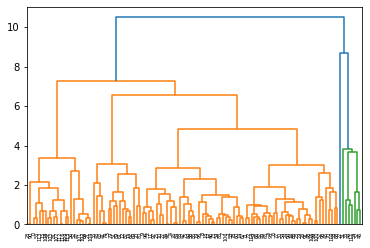

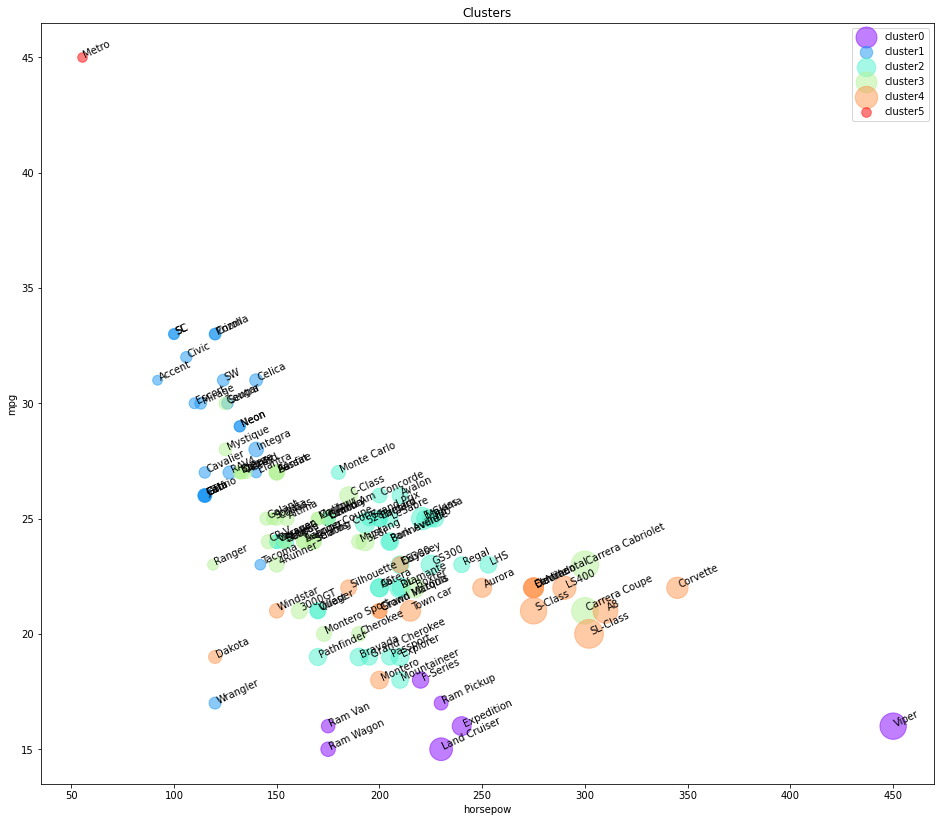

In [10]:
#WEEK 4 HIERARCHIAL CLUSTERING
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 


url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv"
pdf = pd.read_csv(url)

#Data Cleaning : null values removed
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)

#selecting features
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

#normalisation: change feature value between 0 to 1. x-xmin/xmax-xmin
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

#dendrogram

#from sklearn.metrics.pairwise import euclidean_distances can also use "euclidian_distances" instead of "distance_matrix"
dm = distance_matrix(feature_mtx,feature_mtx) 
#print(dm)
Z = hierarchy.linkage(dm, 'complete')
dendro = hierarchy.dendrogram(Z)

#aglomerative clustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dm)

agglom.labels_ # for y as labels of clusters

pdf['cluster_'] = agglom.labels_ # y
pdf.head()

#viz
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


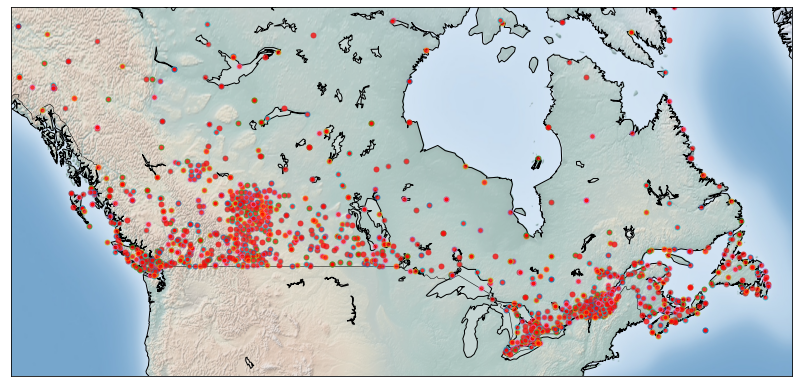

[ 0  0  0 ... -1 -1 -1]
core sample mask [False False False ... False False False]
core sample mask after [ True  True  True ... False False False]


<ipython-input-2-c3c2ecc90fdf>:152: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
<ipython-input-2-c3c2ecc90fdf>:152: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

Cluster 0, Avg Temp: -5.538747553816051
Cluster 1, Avg Temp: 1.9526315789473685
Cluster 2, Avg Temp: -9.195652173913045
Cluster 3, Avg Temp: -15.300833333333333
Cluster 4, Avg Temp: -7.769047619047619


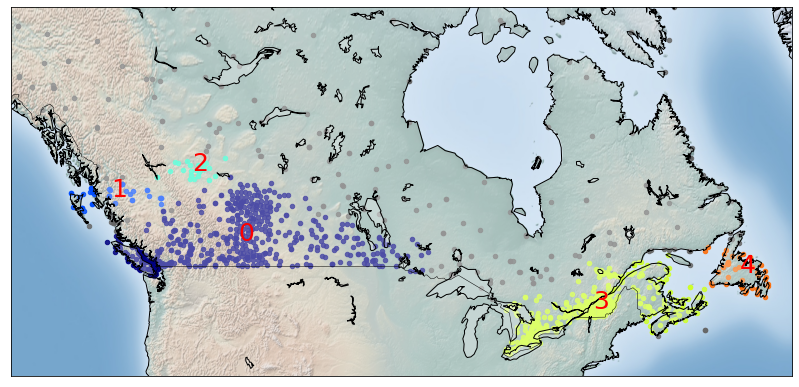

In [2]:
#WEEK 4: Clustering: DBSCAN

import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 


url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/weather-stations20140101-20141231.csv"
pdf = pd.read_csv(url)
pdf.head(5)

#data cleaning;Let's remove rows that don't have any value in the Tm field.
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)










#viz 1 






#basemap fix
import os
os.environ["PROJ_LIB"] = "C:\\Utilities\\Python\\Anaconda\\Library\\share"; 
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()







#dbscan
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
labels=db.labels_
print(labels)

# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
print("core sample mask",core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
print("core sample mask after",core_samples_mask)
labels = db.labels_
pdf["Clus_Db"]=labels

# Number of clusters in labels, ignoring noise if present.
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
# Remove repetition in labels by turning it into a set.en(set(labels)) 
set(labels)

# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)










#viz 2:




from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))



        



In [65]:
#WEEK 5: RECOMMENDATION SYSTEMS: CONTENT BASED


import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=True)
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())
movies_df['genres'] = movies_df.genres.str.split('|')
movies_df.head()
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
moviesWithGenres_df = movies_df.copy()


for index, row in movies_df.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()


#ratings df
#Drop removes a specified row or column from a dataframe
ratings_df = ratings_df.drop('timestamp', 1)
ratings_df.head()



#content based recommender
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

#Filtering out the movies by title
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
#print(inputId)
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('genres', 1).drop('year', 1)
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies


#Filtering out the movies from the input
userMovies = moviesWithGenres_df[moviesWithGenres_df['movieId'].isin(inputMovies['movieId'].tolist())]

#We'll only need the actual genre table
#Resetting the index to avoid future issues
userMovies = userMovies.reset_index(drop=True)
#Dropping unnecessary issues due to save memory and to avoid issues
userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1) 

X=userGenreTable.transpose() #known movies to user matrix 2
y=inputMovies["rating"] #user rated matrix 1
#print(X,y)
userProfile=X.dot(y)  #weighted genre user matrix 3
type(userProfile) #its a Series


#Now let's get the genres of every movie in our original dataframe #UNKNOWN MOVIES TO USER 
genreTable = moviesWithGenres_df.set_index(moviesWithGenres_df['movieId'])
#And drop the unnecessary information
genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
genreTable.head()
genreTable.shape #(34208 rows, 20 columns)
userProfile.shape #(20 rows,) its a series 

#Multiply the genres by the weights and then take the weighted average
recommendationTable_df = ((genreTable*userProfile).sum(axis=1)/userProfile.sum())

#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)
#Just a peek at the values
recommendationTable_df.head()
movies_df.loc[movies_df['movieId'].isin(recommendationTable_df.head(20).keys())]

<ipython-input-65-692ebdaa7c10>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')


movieId
5018      0.748252
26093     0.734266
27344     0.720280
148775    0.685315
6902      0.678322
dtype: float64

In [30]:
#WEEK 5: RECOMMENDATION SYSTEMS: Colaborative BASED


import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())
movies_df = movies_df.drop('genres', 1)
ratings_df = ratings_df.drop('timestamp', 1)

userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)

inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
inputMovies = pd.merge(inputId, inputMovies)
inputMovies = inputMovies.drop('year', 1)
inputMovies

#The users who has seen the same movies
userSubset = ratings_df[ratings_df['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset.head()

#We now group up the rows by user ID.
userSubsetGroup = userSubset.groupby(['userId'])
userSubsetGroup.head()

#Let's look at one of the users, e.g. the one with userID=1130
userSubsetGroup.get_group(1130)

#Sorting it so users with movie most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)
userSubsetGroup[0:3]

'''
Similarity of users to input user
Next, we are going to compare all users (not really all !!!) to our specified user and find the one that is most similar.
we're going to find out how similar each user is to the input through the Pearson Correlation Coefficient.
It is used to measure the strength of a linear association between two variables.
The formula for finding this coefficient between sets X and Y with N values can be seen in the image below.

Why Pearson Correlation?

Pearson correlation is invariant to scaling,
i.e. multiplying all elements by a nonzero constant or adding any constant to all elements.
For example, if you have two vectors X and Y,then, pearson(X, Y) == pearson(X, 2 * Y + 3).
This is a pretty important property in recommendation systems because for example two users might rate two series
of items totally different in terms of absolute rates, but they would be similar users (i.e. with similar ideas)
with similar rates in various scales .
'''

#This limit is imposed because we don't want to waste too much time going through every single user.
userSubsetGroup = userSubsetGroup[0:10]





#calculate the Pearson Correlation between input user and subset group, and store it in a dictionary,
#where the key is the user Id and the value is the coefficient.
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    
    #Get the N for the formula
    nRatings = len(group)# here it is 5 for all groups.
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())] # it is just inputMovies(user) df.
    tempRatingList = temp_df['rating'].tolist() #inputMovies(user) ratings list of those 5 movies
    tempGroupList = group['rating'].tolist() #usersubset group(other users) ratings list of those 5 movies
    correlation, p_value = pearsonr(tempRatingList, tempGroupList) # correalation between 2 ratings lists.
    pearsonCorrelationDict[name] = correlation #key of dictionary is name and value is correlation value.

pearsonCorrelationDict.items()

#converting dictionary into dataframe 
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF

#top users
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)

#Now, let's start recommending movies to the input user.

topUsersRating=topUsers.merge(ratings_df, left_on='userId', right_on='userId', how='inner')
topUsersRating.head(30) # similarity index wale users ki har movie ki rating 

#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()
tempTopUsersRating = tempTopUsersRating[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10) #top 10 recommended movies (only ids)

#top 10 recommended movies (titles searched in movies_df using ids found in upeer line code)
movies_df.loc[movies_df['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]

<ipython-input-30-0800a607c5b6>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')


,movieId,title,year
1150,1173,"Cook the Thief His Wife & Her Lover, The",1989
4443,4537,Running on Empty,1988
4458,4552,"Tetsuo, the Ironman (Tetsuo)",1988
4548,4642,Hedwig and the Angry Inch,2000
7720,8253,Lupin III: The Castle Of Cagliostro (Rupan san...,1979
7901,8582,Manufacturing Consent: Noam Chomsky and the Media,1992
7927,8609,Our Hospitality,1923
8336,9018,Control Room,2004
14750,73587,Soul Kitchen,2009
14785,73824,Abigail's Party,1977
